In [1]:
import torch
import time

In [3]:
# function to standardize/track/benchmark matrix multiplication
def benchmark_matrix_multiplication(size):

    # create 2 random matrices
    M1 = torch.rand(size, size)
    M2 = torch.rand(size, size)

    # move tensors (GPU available)
    if torch.cuda.is_available():
        M1_gpu = M1.cuda()
        M2_gpu = M2.cuda()

    print(f"\nMatrix size: {size} x {size}")

    # perform multiplication on CPU
    start_time = time.time()
    A = torch.mm(M1, M2) # matrix multiplication (on CPU)
    cpu_time = time.time() - start_time
    print(f"CPU Time: {cpu_time:.5f} seconds")


    if torch.cuda.is_available():
        # Perform multiplication on GPU
        start_time = time.time()
        A_gpu = torch.mm(M1_gpu, M2_gpu) #matrix multiplication (on GPU)
        # ensuring that all CUDA operation are finished
        torch.cuda.synchronize()
        gpu_time = time.time() - start_time
        print(f"GPU Time: {gpu_time:.5f} seconds")
    else:
        print("CUDA is not available on this device.")

# Test the benchmark with different matrix sizes
for size in [100, 500, 1000, 2000, 5000]:
    benchmark_matrix_multiplication(size)


Matrix size: 100 x 100
CPU Time: 0.01602 seconds
GPU Time: 0.20611 seconds

Matrix size: 500 x 500
CPU Time: 0.00341 seconds
GPU Time: 0.00302 seconds

Matrix size: 1000 x 1000
CPU Time: 0.00711 seconds
GPU Time: 0.00100 seconds

Matrix size: 2000 x 2000
CPU Time: 0.05291 seconds
GPU Time: 0.00498 seconds

Matrix size: 5000 x 5000
CPU Time: 2.16393 seconds
GPU Time: 0.05954 seconds


In [10]:
!pip install matplotlib
!pip install seaborn

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.5 MB 1.3 MB/s eta 0:00:09
   -- ------------------------------------- 0.8/11.5 MB 1.2 MB/s eta 0:00:09
   --- ------------------------------------ 1.0/11.5 MB 1.2 MB/s eta 0:00:09
   ---- ----------------------------------- 1.3/11.5 MB 1.2 MB/s eta 0:00:09
   ----- ---------------------------------- 1.6/11.5 MB 1.2 MB/s eta 0:00:09
   ------ --------------------------------- 1.8/11.5 MB 1.2 MB/s eta 0:00:09
   ------- -------------------------------- 2.1/11.5 MB 1.2 MB/s eta 0:00:09
   ------- -------------------------------- 2.1/11.5 MB 1.2 MB/s eta 0:00:09
   -------- ------------------------------- 2.4/11.5 MB 1.2 MB/s eta 0:00:08
   --------- ------------------------------ 2.6/11.5 MB 1.2 MB/s eta 0:00:08
   ---------- ------

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

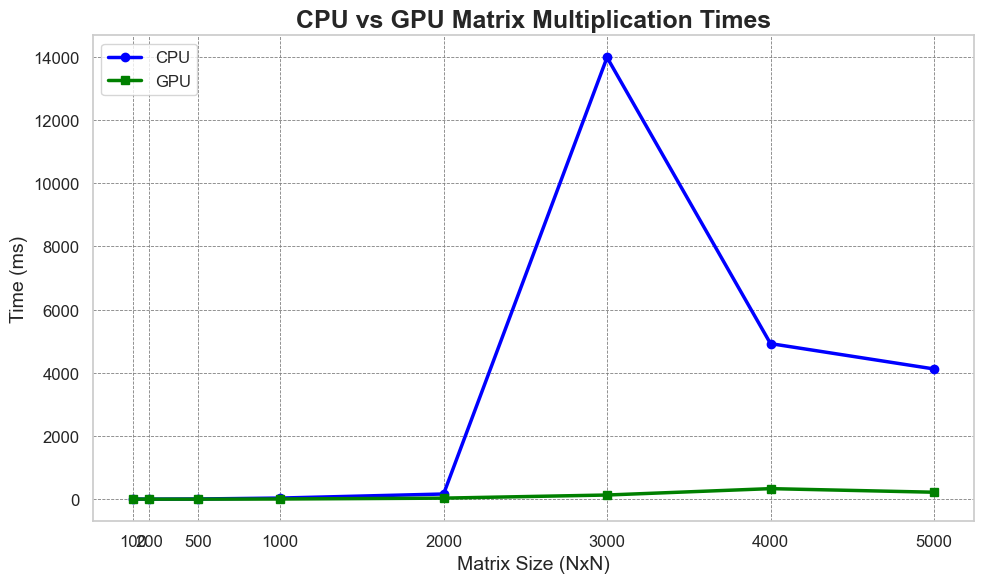

In [12]:
# Set the style for the plots
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Define sizes of matrices for benchmarking
matrix_sizes = [100, 200, 500, 1000, 2000, 3000, 4000, 5000]

# Initialize lists to store time results
cpu_times = []
gpu_times = []

# Benchmark matrix multiplication for each size
for size in matrix_sizes:
    # Generate random matrices
    a_cpu = torch.rand(size, size)
    b_cpu = torch.rand(size, size)
    
    # Move matrices to GPU
    a_gpu = a_cpu.cuda()
    b_gpu = b_cpu.cuda()

    # Benchmark on CPU
    start_time = time.time()
    result_cpu = torch.matmul(a_cpu, b_cpu)
    cpu_times.append(time.time() - start_time)

    # Benchmark on GPU
    start_time = time.time()
    result_gpu = torch.matmul(a_gpu, b_gpu)
    torch.cuda.synchronize()  # Wait for GPU to finish
    gpu_times.append(time.time() - start_time)

# Convert times to milliseconds
cpu_times_ms = [t * 1000 for t in cpu_times]
gpu_times_ms = [t * 1000 for t in gpu_times]

# Plot the results
plt.plot(matrix_sizes, cpu_times_ms, label='CPU', color='blue', marker='o', linewidth=2.5)
plt.plot(matrix_sizes, gpu_times_ms, label='GPU', color='green', marker='s', linewidth=2.5)

# Customize plot with titles, labels, and a legend
plt.title('CPU vs GPU Matrix Multiplication Times', fontsize=18, fontweight='bold')
plt.xlabel('Matrix Size (NxN)', fontsize=14)
plt.ylabel('Time (ms)', fontsize=14)
plt.xticks(matrix_sizes, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper left', fontsize=12)

# Add some grid lines and improve aesthetics
plt.grid(True, which='both', linestyle='--', linewidth=0.6, color='gray')

# Show the plot
plt.tight_layout()
plt.show()